In [1]:
import pandas as pandas
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input,Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical,plot_model
from IPython.display import Image

In [2]:
# Importing Dataset (MNIST)
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
# Checking the shape 
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

Label -> 9


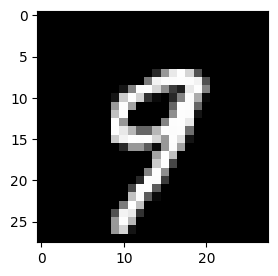

In [4]:
# Seeing a Data
i=57
plt.figure(figsize=(3,3))
plt.imshow(x_train[i],cmap='gray')
print("Label ->",y_train[i])
plt.show()

In [5]:
# NOrmalizing the data
x_train = x_train/255
x_test = x_test/255

In [6]:
# Changing the numerical value 
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
# Creating the Model

model = Sequential()

model.add(Input(shape=(28,28,1)))

# Convolutional layer 1
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))

# Pooling layer 1
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 2
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

# Pooling layer 2
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten before fully connected layers
model.add(Flatten())

# Fully connected (Dense) layer
model.add(Dense(128, activation='relu'))

# Output layer (10 classes for MNIST)
model.add(Dense(10, activation='softmax'))

In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


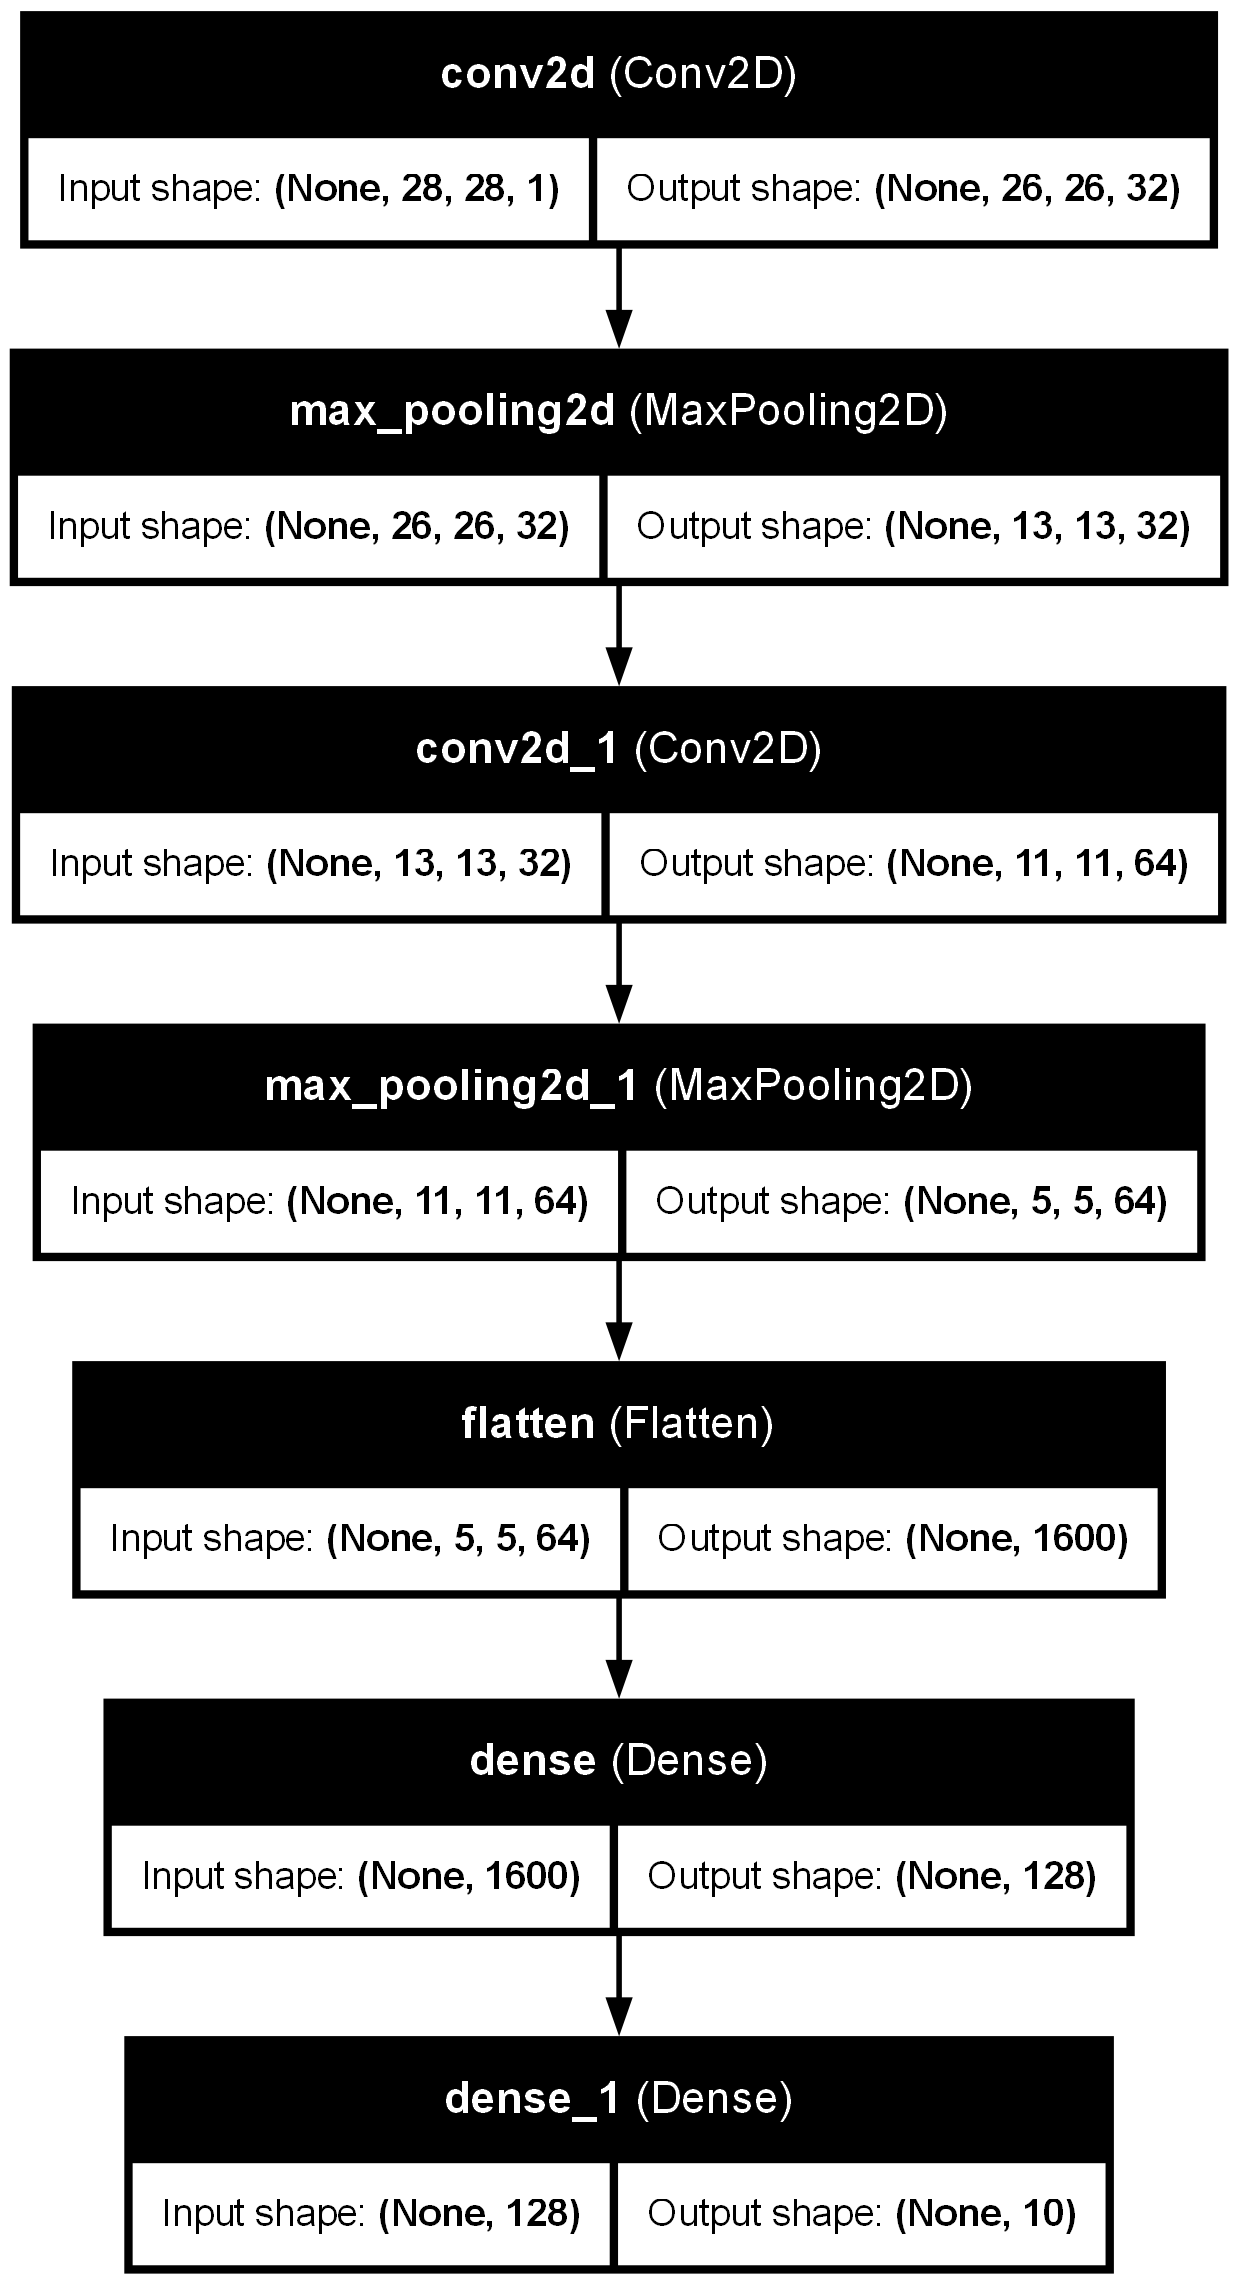

In [9]:
# Plot the model for visual representation
#os.makedirs('bin',exist_ok=True)
#plot_model(model, to_file='bin/cnn_model.png', show_shapes=True, show_layer_names=True)

Image(filename='bin/cnn_model.png')

In [10]:
# Training the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9562 - loss: 0.1407 - val_accuracy: 0.9820 - val_loss: 0.0649
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9851 - loss: 0.0467 - val_accuracy: 0.9862 - val_loss: 0.0461
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9902 - loss: 0.0313 - val_accuracy: 0.9908 - val_loss: 0.0320
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9931 - loss: 0.0217 - val_accuracy: 0.9900 - val_loss: 0.0378
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9942 - loss: 0.0166 - val_accuracy: 0.9905 - val_loss: 0.0422


In [11]:
# Testing the Accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9889 - loss: 0.0368
Test accuracy: 0.9889000058174133


In [12]:
# Prediction on one single image
prediction = model.predict(np.reshape(x_test[0],(1,28,28,1)))
np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


np.int64(7)

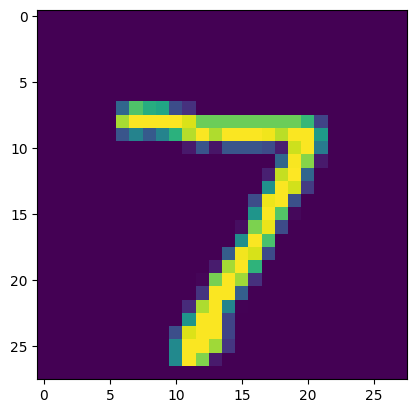

In [13]:
plt.imshow(x_test[0])
plt.show()

In [14]:
# Saving the model
model.save('bin/model.keras')